## 이미지(Image) 데이터

- 만약 많은 양의 이미지 데이터(그림 또는 사진)가 있을 경우 사람이 하나씩 분류해 종류별로 정리하기 쉽지 않다. 이 경우도 각 이미지에 어떤 분류인지 써있는 것이 아니기 때문에 비지도학습을 통해 분류하는 방법을 생각해 볼 수 있다.

- 이미지 데이터 자체로는 데이터 분석으로 적합한 형태가 아니기 때문에 우리가 사용할 수 있는 형태로 만들어 주어야 한다. 우리는 이때 이미지의 픽셀을 통해 우리가 사용할 수 있는 형태의 데이터로 전환시킬 수 있다.

### 이미지 자료 실습 - 과일(fruits) 데이터셋

- link: https://www.kaggle.com/moltean/fruits
- The total number of images: 90483.
- Training set size: 67692 images (one fruit or vegetable per image).
- Test set size: 22688 images (one fruit or vegetable per image).
- The number of classes: 131 (fruits and vegetables).
- Image size: 100x100 pixels.


※ 원 데이터는 매우 크지만 우리는 300개의 자료로 압축된 파일을 불러와 사용하고자 한다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import rc 
rc('font',family='AppleGothic')

In [3]:
fruits = np.load('/Users/zoe/Downloads/fruits_300.npy')

In [4]:
print(fruits.shape) # 순서대로 sample 수, 이미지의 높이, 이미지의 너비를 의미함 (즉, 100x100 크기의 300개의 이미지 자료)

(300, 100, 100)


- 몇 장의 사진을 확인해보자.

In [5]:
print(fruits[0, 0, :])
print(fruits[0, 1, :])
print()
print('...')
print()
print(fruits[0, 49, :])
print()
print('...')
print()
print(fruits[0, 99, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   2   2   1   1   1   1
   2   4   3   1   2   1   1   1   1   1   2   2   3   1   2   2   3  24
 112 163 229 132  30   1   4   2   2   2   3   2   1   1   3   1   2   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]

...

[  2   1   3   2   1  47  87  75  76  74  75  76  74  74  71  66  64  66
  64  63  62  59  58  60  56  55  53  52  50  49  47  47  49  49  50  50
  51  54  57  59  64  66  69  73  

- 첫번째 사진의 1~100행에 대한 픽셀값을 출력한 내용이다. 각 픽셀 값이 0에 가까울수록 어둡게 나오고 값이 255에 가까울수록 밝게 표시됨을 아래의 사진을 통해 확인할 수 있다.

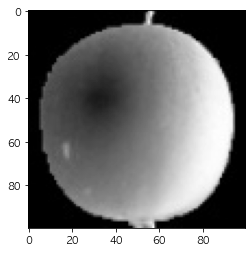

In [6]:
plt.imshow(fruits[0], cmap = 'gray')

-여기서 보통과는 다르게 바탕이 검은색임을 확인할 수 있다. 이는 우리의 관심 대상은 바탕이 아니라 사물이다. 원래대로면 바탕이 밝고, 사물이 어두운 형태가 되어 사물을 표시하는 픽셀의 값이 0에 가까운 수가 나오게 되는데, 이를 그대로 사용하게 되면 연산 도중(분석 과정) 값이 0으로 되어 의미가 없어지게 된다. 관심 갖는 대상의 영역의 출력값이 높게 나오게 하기 위해 반전해서 사용한다. 아래는 반전하기 이전의 이미지 모습이다.

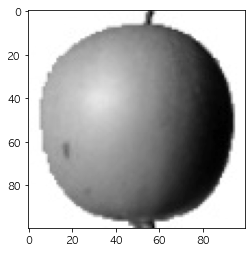

In [7]:
plt.imshow(fruits[0], cmap = 'gray_r')

- 우리가 사용하는 데이터셋에는 위의 사과 모양 사진 이외에도 파인애플, 바나나 총 3가지 종류 각각 100장씩 들어있다. (처음부터 100개씩 사과, 파인애플, 바나나 사진 순)

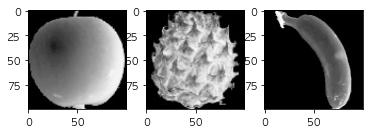

In [8]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(fruits[70], cmap = 'gray')
axs[1].imshow(fruits[170], cmap = 'gray')
axs[2].imshow(fruits[220], cmap = 'gray')
plt.show()

In [25]:
fruits[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [29]:
fruits[0].reshape(-1, 100*100) # 아래로 이어져있던 게 옆으로 이동!

array([[1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [32]:
# 각 과일별로 데이터 분리, 3차원 배열을 2차원 배열로 간소화
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [33]:
print(apple.shape)
print(pineapple.shape)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


In [34]:
print(apple[0, 100:200] == fruits[0, 1, :])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


- 픽셀 값을 통해 과일을 분류하는 방법으로는 우선 평균 픽셀 값(각 사진별)을 생각해볼 수 있다.

In [35]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


In [36]:
print(pineapple.mean(axis=1))

[ 99.3239  87.1622  97.193   97.4689  98.8892  97.8819  95.1444  92.9461
  95.8412  96.9487  93.2863 101.2771  91.6511  98.3901  84.3277 100.7017
  99.0229  87.5298  99.4109  91.8568  90.3877  99.5066  95.8498  96.0728
 100.0062  95.5283  95.2715  98.1624  93.1395  99.1666  99.9519  96.732
  94.16   100.7644 101.1263  98.2852  98.5354 101.3809  95.4862  93.1256
  87.6404  93.7146  94.7279  85.5131  95.0937  95.3236  92.7696  94.4375
  99.36    95.8924  97.8221  99.4014  99.325   95.025   97.5771  97.3511
  99.4891  97.366  101.0062  91.2304  95.2824  95.3544 101.4657  97.5239
  98.8419  96.746   98.2922  96.3969  81.9464  93.4927  97.3872  82.4883
  95.3665  95.2541 101.3074  97.2391  95.4544 100.5576 100.2927  94.3088
  95.7401  97.0982  96.9559  92.9114  97.4164 100.769   97.808   99.2481
 101.0643  94.8173  99.2639  98.8539  97.2198  97.0201  94.5039  98.097
  95.0201  98.8078  99.4634 100.0257]


In [37]:
print(banana.mean(axis=1))

[19.5487 24.4884 36.7517 18.568  53.572  31.5789 51.9062 28.4703 23.7856
 32.1295 29.1737 24.5578 27.7676 41.3082 61.0437 32.6444 38.4187 30.4175
 30.0639 21.4994 32.6018 39.6335 47.8397 57.7484 33.6511 23.5018 49.6817
 44.0855 46.1559 33.4963 36.0099 69.0751 33.9575 32.8786 60.1911 32.9949
 45.3359 56.1694 36.9218 25.6754 32.7901 29.0245 57.7134 44.6563 31.2138
 29.836  40.9228 23.7501 43.1543 32.3716 26.0986 55.6189 22.2269 29.5089
 24.0435 22.6247 24.1709 46.2714 32.0763 42.5076 44.5522 24.0199 27.68
 32.4377 19.2198 22.5083 19.6742 26.1852 25.8368 25.2676 26.4721 34.8503
 28.5235 80.8545 36.9371 47.3975 18.7909 33.0428 37.8222 34.7819 33.6051
 24.3963 32.7988 19.7609 32.538  28.5407 23.0999 26.3778 27.1965 38.7848
 18.7648 30.2297 54.3816 37.9073 32.3126 31.0664 33.1657 37.6051 38.1806
 26.2805]


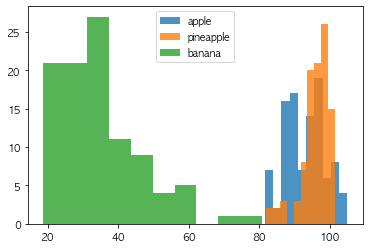

In [38]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

- 여기서는 바나나는 잘 구분되어 보이지만, 사과와 파인애플은 잘 구분되지 않는 것을 확인할 수 있다. 바나나는 얇은 모양이기 때문에 다른 두 과일에 비해 바탕이 많아 전체적으로 이미지의 평균 픽셀 값이 0에 가까워진 것이다.

- 이미지 전체 픽셀의 평균으로는 사과와 파인애플을 구별하기 힘들기 때문에 이번에는 픽셀 위치별로 평균값을 계산해 비교해 보도록 하자.

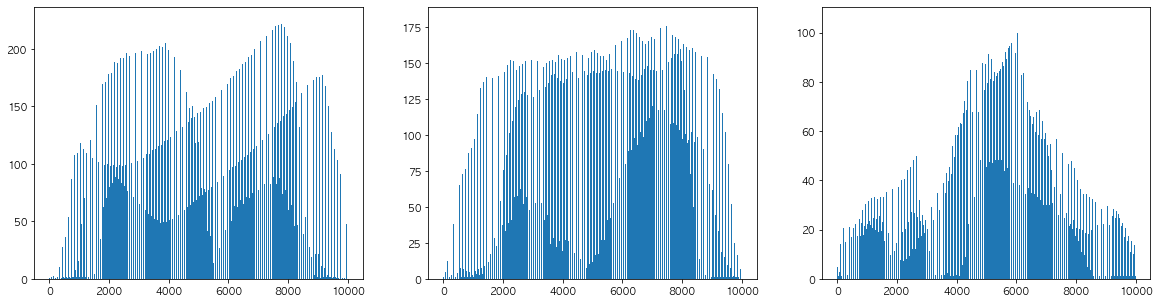

In [39]:
fig, axs = plt.subplots(1, 3, figsize = (20,5))
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()

- 픽셀 위치별로 평균값을 나태내보면 각 과일별 차이가 나타난다. 픽셀 위치별 평균값을 사용해 이미지를 생성해보면 아래와 같다.

In [40]:
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)

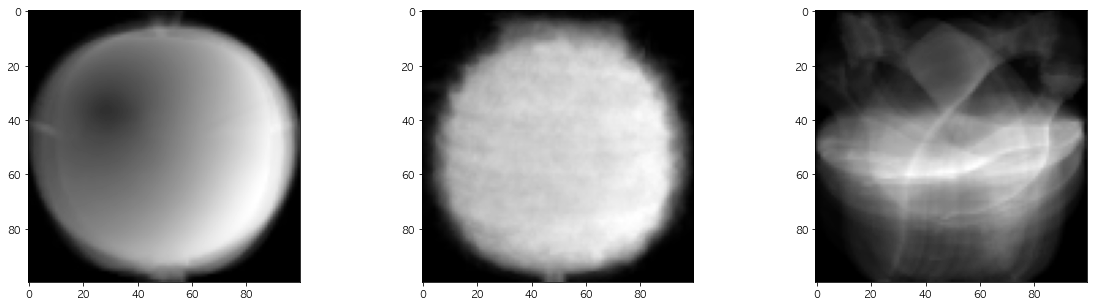

In [41]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].imshow(apple_mean, cmap = 'gray')
axs[1].imshow(pineapple_mean, cmap = 'gray')
axs[2].imshow(banana_mean, cmap = 'gray')
plt.show()

- 픽셀별 평균값으로 이미지를 복원해본 결과 각 과일의 특징이 잘 나타나는 것을 확인할 수 있다. 그렇다면 픽셀별 평균값을 활용해 이미지를 분류할 수 있는지 확인해보자.

In [47]:
fruits[0]-apple_mean

array([[-0.01, -0.01, -0.01, ...,  0.  ,  0.  ,  0.  ],
       [-0.01, -0.01,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [49]:
fruits[0]-banana_mean

array([[-0.1 , -0.07, -0.1 , ..., -0.04, -0.01, -0.05],
       [-0.12, -0.03, -0.04, ...,  0.  , -0.01,  0.  ],
       [-0.06, -0.02, -0.02, ...,  0.  , -0.05,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [54]:
# 각 과일의 픽셀별 평균값을 뺀 차이의 절대값 산출
abs_diff_apple = np.abs(fruits - apple_mean)
abs_diff_pineapple = np.abs(fruits - pineapple_mean)
abs_diff_banana = np.abs(fruits - banana_mean)

# 그것에 대한 평균을 낸다.
abs_mean_apple = np.mean(abs_diff_apple, axis = (1, 2))
abs_mean_pineapple = np.mean(abs_diff_pineapple, axis = (1, 2))
abs_mean_banana = np.mean(abs_diff_banana, axis = (1, 2))

print(abs_mean_apple.shape)
print(abs_mean_pineapple.shape)
print(abs_mean_banana.shape)

(300,)
(300,)
(300,)


In [52]:
abs_diff_apple

array([[[0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       ...,

       [[0.01, 0.01, 0.0

In [53]:
abs_mean_apple

array([17.37576 , 13.508874, 17.183394, 15.68311 , 17.983306, 20.565392,
       16.795812, 16.144276, 19.611994, 21.32059 , 16.454222, 16.590134,
       13.37039 , 17.23263 , 15.92806 , 15.496638, 18.582212, 16.48196 ,
       27.651556, 19.7871  , 20.826912, 16.417934, 17.059946, 15.904296,
       15.086176, 19.371364, 24.076362, 14.777732, 19.20517 , 20.805182,
       14.797906, 18.658418, 15.973216, 13.04259 , 18.381052, 16.59904 ,
       16.288504, 18.960586, 13.88574 , 16.497594, 18.40376 , 19.174642,
       29.096702, 18.40849 , 28.223962, 21.42994 , 19.740466, 15.590532,
       13.082678, 18.765996, 14.391198, 21.464746, 26.261028, 15.887148,
       18.568706, 16.410426, 17.108034, 13.178824, 18.199846, 13.503056,
       20.845032, 16.898184, 22.81774 , 18.99896 , 19.102706, 16.636216,
       14.845644, 19.357872, 14.778086, 14.468082, 13.085526, 15.946606,
       20.42774 , 16.241996, 13.720382, 18.416166, 15.229106, 16.411342,
       13.47148 , 20.050622, 17.296816, 21.071312, 

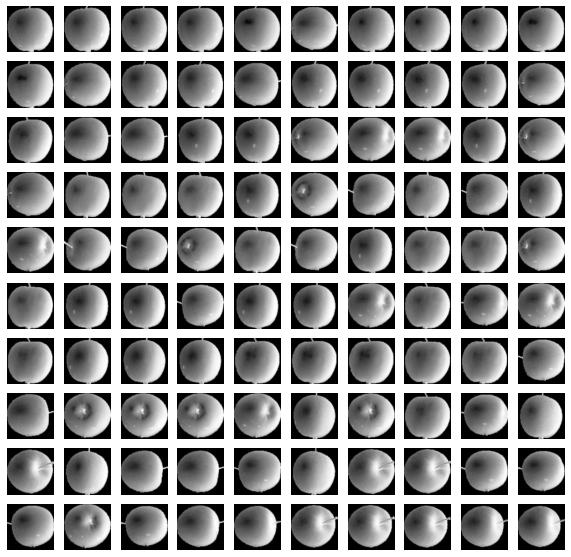

In [55]:
# 사과의 픽셀별 평균값을 뺀 차이의 절대값이 가장 작은 100개 선택해 출력
apple_index = np.argsort(abs_mean_apple)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray')
        axs[i, j].axis('off')
plt.show()

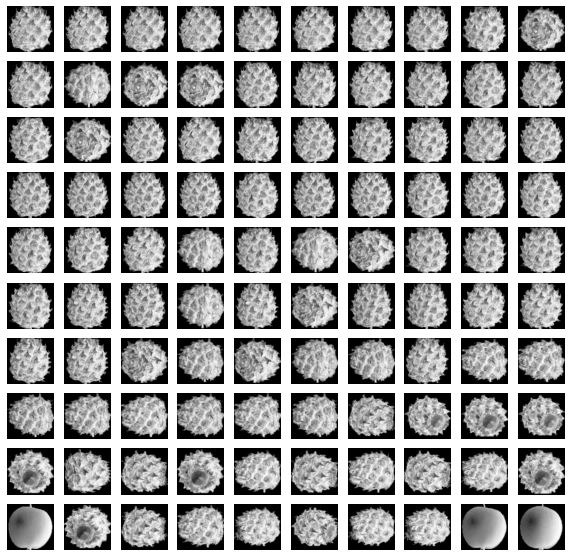

In [56]:
# 파인애플의 픽셀별 평균값을 뺀 차이의 절대값이 가장 작은 100개 선택해 출력
pineapple_index = np.argsort(abs_mean_pineapple)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[pineapple_index[i*10 + j]], cmap = 'gray')
        axs[i, j].axis('off')
plt.show()

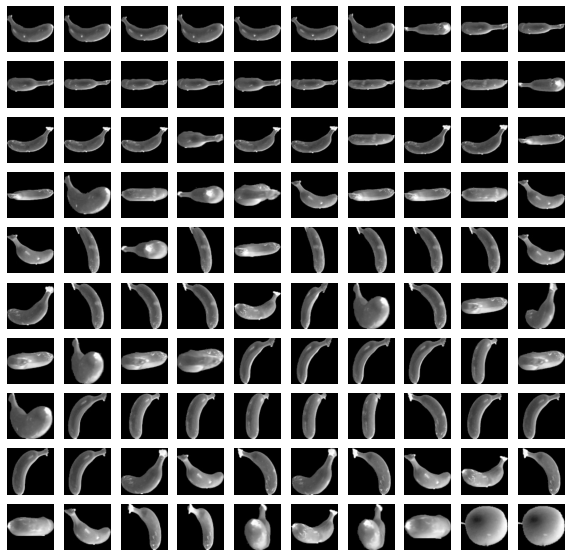

In [57]:
# 바나나의 픽셀별 평균값을 뺀 차이의 절대값이 가장 작은 100개 선택해 출력
banana_index = np.argsort(abs_mean_banana)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap = 'gray')
        axs[i, j].axis('off')
plt.show()